# Assignment # 01: Data Preprocessing and Visualization

### Name: Abdul Rafay Ahmad
### Class: BESE9A
### CMS ID: 254636

# CS471: Machine Learning
### BESE-9 AB
### Instructors: Dr Omar Arif
#### Due Date: March 28, 2021

### Introduction

The Novel Coronavirus (COVID19) which causes respiratory illnesss was first detected in Wuhan, China. Since the disease is contagious, it has spread all over the world due to the high number of tourism and business visits to / from China. As you all are very well aware, COVID19 has been labelled as a global pandemic now by World Health Organization. 
Scientists all over the world are trying to drive insights from the datasets to come up with a possible prediction which will help with estimating the spread, and the virus frequency and duration. 
Johns Hopkins University has made an excellent dashboard using the affected cases data. The dataset is made available at Kaggle and can be downloaded for the purpose of research.
For this assignment, we will use the Kaggle COVID-19 dataset (Download here: <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" title="DATASET">DATASET</a>) and will try to learn some insights using the power of Machine Learning.
The Johns Hopkins University's web based dashboard can be accessed here:
<a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6" title="Web Dashboard">Web Dashboard</a>

#### Question # 01

As you must have noticed, there are 6 files in the data you have downloaded from Kaggle.
For this question, we will use the main file `covid_19_data.csv`.
The steps to follow are given:
1. Read the data file and examine the features
2. Since the dataset is a bit sparse, clean the dataset by dropping rows which have missing points.
3. Print the initial 10 rows of the data.

Note: Please use Pandas

In [89]:
import pandas as pd
import numpy as np

#Reading the file
# Using parse_dates to bring proper formating on dates for later use in Q3
df = pd.read_csv("covid_19_data.csv", parse_dates = ['ObservationDate'])

#Droping rows with missing variables
df.dropna()
df.drop(df[df['Province/State'] == 'Recovered'].index , inplace = True)
df.drop(df[df['Province/State'] == 'US'].index , inplace = True)

#Printing first 10 rows
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,2020-01-22,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,2020-01-22,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,2020-01-22,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,2020-01-22,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,2020-01-22,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


#### Question # 02

1. Rank the countries in the dataset in descending order according to the number of deaths.
2. Figure out the most affected provinces/states in top 3 countries with most number of Deaths.
3. Repeat the first two steps for Recovered and Confirmed cases as well.
4. Plot a bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

In [90]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Shortlisting by using groupby
gd = df.groupby('Country/Region')
sum_gd = gd.sum('Deaths')

#Sorting in decending order
sort_by_death = sum_gd.sort_values(by=['Deaths'], ascending = False)
sort_by_death.head(10)

,SNo,Confirmed,Deaths,Recovered
Country/Region,,,,
US,2152328402,3.201291e+09,72223040.0,2.610000e+02
Brazil,990718125,1.417935e+09,40013970.0,1.223330e+09
India,1329199205,1.705856e+09,26087127.0,1.553543e+09
Mexico,1194396779,2.532551e+08,24061279.0,1.973491e+08
UK,595195427,3.854992e+08,17619785.0,1.082499e+06
Italy,773600304,2.977199e+08,15638400.0,2.007154e+08
France,426411242,3.957382e+08,13676000.0,3.974989e+07
Spain,735916505,3.401954e+08,12140448.0,4.750940e+07
Iran,37646369,2.000090e+08,9572350.0,1.616783e+08


## We can see that the top 3 countries are:
### US 
### Brazil 
### India

## For US

In [91]:
#Most number of deaths
ud = df[df['Country/Region'] == "US"]
gud = ud.groupby('Province/State')
sum_us = gud.sum('Deaths')
up_deaths = sum_us.sort_values(by=['Deaths'], ascending = False)
up_deaths.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
New York,37724933,204886336.0,10888511.0,0.0
California,37648885,360363199.0,5358608.0,40.0
Texas,37769945,294436008.0,5072817.0,0.0
New Jersey,37724344,98775452.0,5054435.0,2.0
Florida,37665975,235208135.0,4153905.0,0.0
Illinois,37685783,145944278.0,3412248.0,16.0
Pennsylvania,37740024,94899462.0,3191622.0,0.0
Massachusetts,37710778,66637242.0,3057465.0,8.0
Michigan,37714672,77041280.0,2720980.0,5.0


In [92]:
#Most number of Confirmed cases
sum_us = gud.sum('Confirmed')
up_confirmed = sum_us.sort_values(by=['Confirmed'], ascending = False)
up_confirmed.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
California,37648885,360363199.0,5358608.0,40.0
Texas,37769945,294436008.0,5072817.0,0.0
Florida,37665975,235208135.0,4153905.0,0.0
New York,37724933,204886336.0,10888511.0,0.0
Illinois,37685783,145944278.0,3412248.0,16.0
Georgia,37669928,115385674.0,2208651.0,0.0
New Jersey,37724344,98775452.0,5054435.0,2.0
Ohio,37734327,95345599.0,2213309.0,0.0
Pennsylvania,37740024,94899462.0,3191622.0,0.0


In [93]:
#Most number of Recovered Cases
sum_us = gud.sum('Recovered')
up_recovered = sum_us.sort_values(by=['Recovered'], ascending = False)
up_recovered.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
"Chicago, IL",48622,61.0,0.0,44.0
California,37648885,360363199.0,5358608.0,40.0
"Seattle, WA",49127,43.0,2.0,22.0
"San Diego County, CA",69323,59.0,0.0,18.0
"Cook County, IL",28994,42.0,0.0,16.0
Illinois,37685783,145944278.0,3412248.0,16.0
"Santa Clara, CA",65269,131.0,0.0,15.0
"Tempe, AZ",66274,35.0,0.0,11.0
Massachusetts,37710778,66637242.0,3057465.0,8.0


## For Brazil

In [94]:
#Most number of deaths
bd = df[df['Country/Region'] == "Brazil"]
gbd = bd.groupby('Province/State')
sum_br = gbd.sum('Deaths')
bp_deaths = sum_br.sort_values(by=['Deaths'], ascending = False)
bp_deaths.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
Sao Paulo,36675089,279368429.0,9651617.0,232197497.0
Rio de Janeiro,36668405,81618851.0,5335936.0,73533562.0
Ceara,36575675,68514032.0,2391702.0,55406133.0
Pernambuco,36659949,42987381.0,2198059.0,35768498.0
Minas Gerais,36636028,94650740.0,2142423.0,83403303.0
Para,36657993,61655247.0,1772550.0,56574259.0
Bahia,36563817,89579067.0,1767392.0,83981129.0
Rio Grande do Sul,36668121,68608980.0,1468511.0,63711496.0
Parana,36658561,65404101.0,1363213.0,45987495.0


In [95]:
#Most confirmed cases
sum_br = gbd.sum('Confirmed')
bp_confirmed = sum_br.sort_values(by=['Confirmed'], ascending = False)
bp_confirmed.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
Sao Paulo,36675089,279368429.0,9651617.0,232197497.0
Minas Gerais,36636028,94650740.0,2142423.0,83403303.0
Bahia,36563817,89579067.0,1767392.0,83981129.0
Rio de Janeiro,36668405,81618851.0,5335936.0,73533562.0
Santa Catarina,36674529,75150208.0,856137.0,69820814.0
Rio Grande do Sul,36668121,68608980.0,1468511.0,63711496.0
Ceara,36575675,68514032.0,2391702.0,55406133.0
Parana,36658561,65404101.0,1363213.0,45987495.0
Para,36657993,61655247.0,1772550.0,56574259.0


In [96]:
#Most recovered cases
sum_br = gbd.sum('Recovered')
bp_recoverd = sum_br.sort_values(by=['Recovered'], ascending = False)
bp_recoverd.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
Sao Paulo,36675089,279368429.0,9651617.0,232197497.0
Bahia,36563817,89579067.0,1767392.0,83981129.0
Minas Gerais,36636028,94650740.0,2142423.0,83403303.0
Rio de Janeiro,36668405,81618851.0,5335936.0,73533562.0
Santa Catarina,36674529,75150208.0,856137.0,69820814.0
Rio Grande do Sul,36668121,68608980.0,1468511.0,63711496.0
Para,36657993,61655247.0,1772550.0,56574259.0
Ceara,36575675,68514032.0,2391702.0,55406133.0
Goias,36594570,54698625.0,1218360.0,51201427.0


## For India

In [97]:
#Most number of deaths
id = df[df['Country/Region'] == "India"]
gid = id.groupby('Province/State')
sum_in = gid.sum('Deaths')
ip_deaths = sum_in.sort_values(by=['Deaths'], ascending = False)
ip_deaths.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
Maharashtra,35950825,340363684.0,9117030.0,299958534.0
Tamil Nadu,36003779,149205740.0,2276698.0,139486288.0
Karnataka,35936910,154517083.0,2126982.0,140790572.0
Delhi,35908143,96761076.0,1780439.0,90193900.0
West Bengal,36022724,83397236.0,1527008.0,76963046.0
Uttar Pradesh,36015460,97905298.0,1437894.0,89721893.0
Andhra Pradesh,35881101,156307807.0,1290094.0,146826794.0
Gujarat,35921323,40694517.0,893107.0,36892518.0
Punjab,35982907,27180475.0,849547.0,24549388.0


In [98]:
#Most number of confirmed
sum_in = gid.sum('Confirmed')
ip_confirmed = sum_in.sort_values(by=['Confirmed'], ascending = False)
ip_confirmed.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
Maharashtra,35950825,340363684.0,9117030.0,299958534.0
Andhra Pradesh,35881101,156307807.0,1290094.0,146826794.0
Karnataka,35936910,154517083.0,2126982.0,140790572.0
Tamil Nadu,36003779,149205740.0,2276698.0,139486288.0
Kerala,35937699,105723043.0,409727.0,92777438.0
Uttar Pradesh,36015460,97905298.0,1437894.0,89721893.0
Delhi,35908143,96761076.0,1780439.0,90193900.0
West Bengal,36022724,83397236.0,1527008.0,76963046.0
Odisha,35972950,54230550.0,280139.0,51140244.0


In [99]:
#Most number of recovered
sum_in = gid.sum('Recovered')
ip_recoverd = sum_in.sort_values(by=['Recovered'], ascending = False)
ip_recoverd.head(10)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
Maharashtra,35950825,340363684.0,9117030.0,299958534.0
Andhra Pradesh,35881101,156307807.0,1290094.0,146826794.0
Karnataka,35936910,154517083.0,2126982.0,140790572.0
Tamil Nadu,36003779,149205740.0,2276698.0,139486288.0
Kerala,35937699,105723043.0,409727.0,92777438.0
Delhi,35908143,96761076.0,1780439.0,90193900.0
Uttar Pradesh,36015460,97905298.0,1437894.0,89721893.0
West Bengal,36022724,83397236.0,1527008.0,76963046.0
Odisha,35972950,54230550.0,280139.0,51140244.0


# Bar Charts

## For US

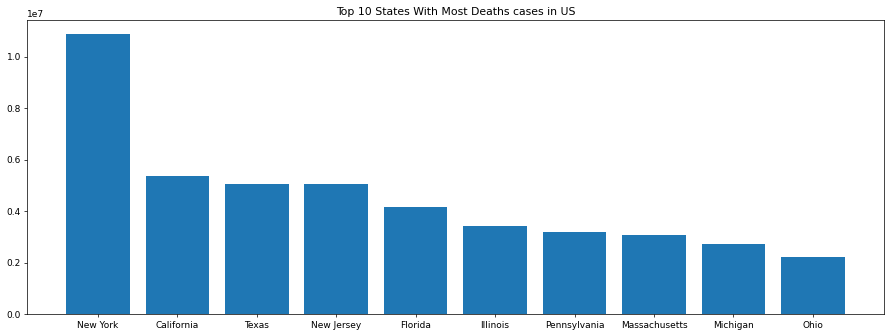

In [100]:
#Selecting the top states with most deaths in US
top_deaths_us = sum_us.sort_values(by=['Deaths'], ascending = False)
top_deaths_us = top_deaths_us[0:10]
top_deaths_us = top_deaths_us.reset_index(drop=False)

figure(figsize=(17, 6), dpi=65)
plt.title("Top 10 States With Most Deaths cases in US")
plt.bar(top_deaths_us['Province/State'], top_deaths_us['Deaths'])
plt.show()

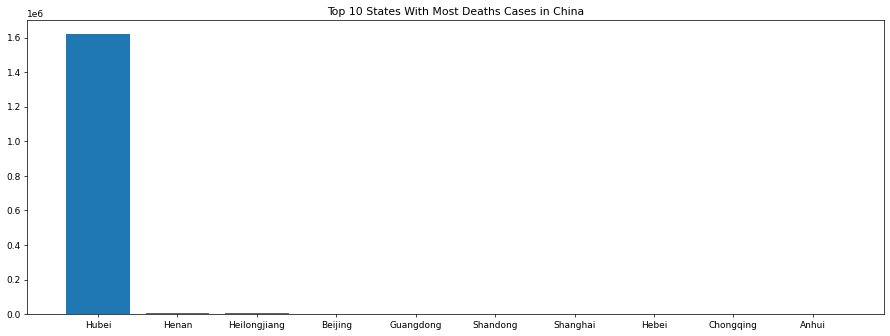

In [101]:
#Selecting the top states with most deaths in China
cd = df[df['Country/Region'] == "Mainland China"]
cud = cd.groupby('Province/State')
sum_ch = cud.sum('Deaths')
top_deaths_ch = sum_ch.sort_values(by=['Deaths'], ascending = False)
top_deaths_ch = top_deaths_ch[0:10]
top_deaths_ch = top_deaths_ch.reset_index(drop=False)

figure(figsize=(17, 6), dpi=65)
plt.title("Top 10 States With Most Deaths Cases in China")
plt.bar(top_deaths_ch['Province/State'], top_deaths_ch['Deaths'])
plt.show()

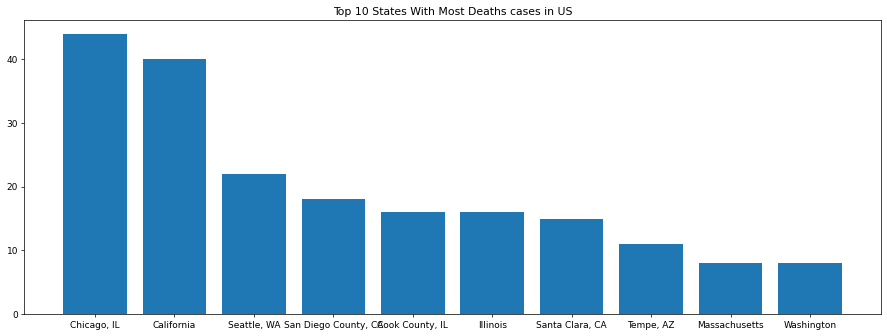

In [102]:
#Selecting the top states with most recoverd cases in US
top_recovered_us = sum_us.sort_values(by=['Recovered'], ascending = False)
top_recovered_us = top_recovered_us[0:10]
top_recovered_us = top_recovered_us.reset_index(drop=False)

figure(figsize=(17, 6), dpi=65)
plt.title("Top 10 States With Most Deaths cases in US")
plt.bar(top_recovered_us['Province/State'], top_recovered_us['Recovered'])
plt.show()

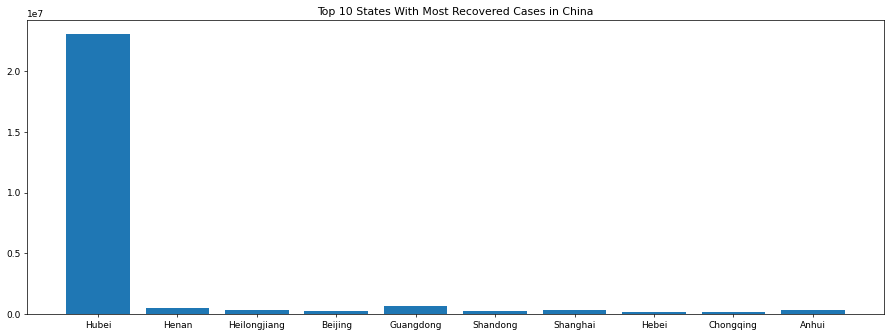

In [103]:
#Selecting the top states with most recoverd cases in China
top_recovered_ch = sum_ch.sort_values(by=['Recovered'], ascending = False)
top_recovered_ch = top_deaths_ch[0:10]
top_recovered_ch = top_deaths_ch.reset_index(drop=False)

figure(figsize=(17, 6), dpi=65)
plt.title("Top 10 States With Most Recovered Cases in China")
plt.bar(top_recovered_ch['Province/State'], top_recovered_ch['Recovered'])
plt.show()

#### Question # 03

Since we have dates in the data, let's quantify out how the virus has spread over time and which areas are most affected by the virus. This will help us figure out if the situation is getting any better over time or not.

1. Plot the confirmed, deaths and recovered cases as line graphs with dates for US, Iran and China each.
2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?
3. Work out the death rate due to COVID-19 in these three countries.
4. By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran and China) and then answer the question?

In [104]:
## For US

No handles with labels found to put in legend.


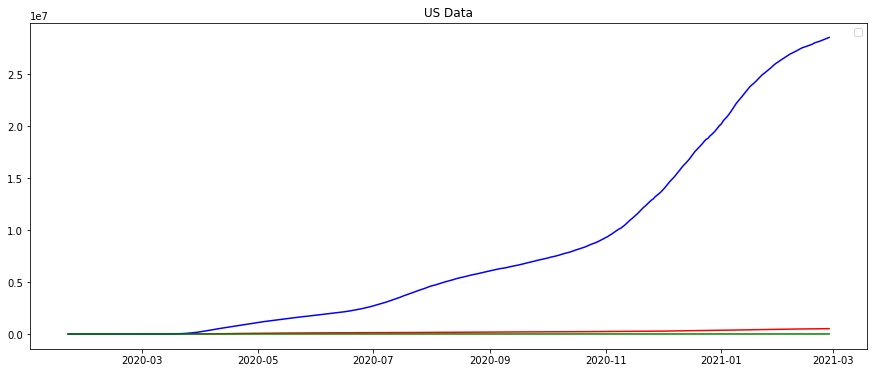

In [105]:
#ud = df[df['Country/Region'] == "US"]
#Shortlist by using groupby on ObservationDate
gud = ud.groupby('ObservationDate')
sum_us = gud.sum('Deaths')
sum_us = sum_us.reset_index(drop=False)

x = sum_us['ObservationDate']
y1 = sum_us['Deaths']
y2 = sum_us['Confirmed']
y3 = sum_us['Recovered']

fig,ax = plt.subplots(figsize=(15, 6))
plt.title("US Data")
plt.legend()
plt.plot(x, y1, label="Deaths", color="red")
plt.plot(x, y2, label="Confirmed", color="blue")
plt.plot(x, y3, label="Recovered", color="green")
plt.show()

## For Iran

No handles with labels found to put in legend.


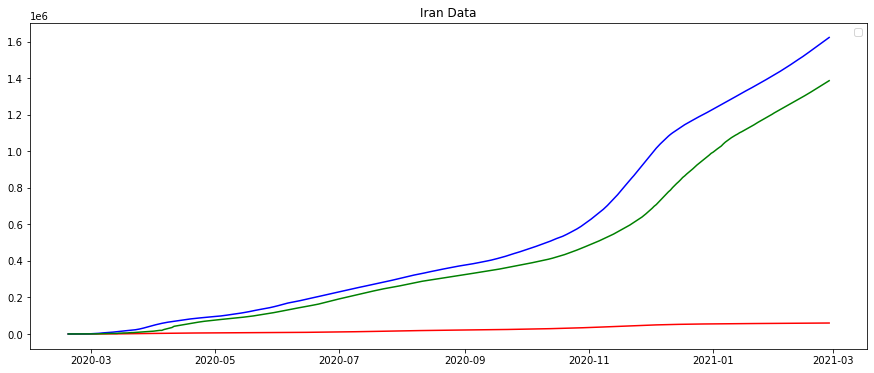

In [106]:
ird = df[df['Country/Region'] == "Iran"]
gird = ird.groupby('ObservationDate')
sum_ir = gird.sum('Deaths')
sum_ir = sum_ir.reset_index(drop=False)

x = sum_ir['ObservationDate']
y1 = sum_ir['Deaths']
y2 = sum_ir['Confirmed']
y3 = sum_ir['Recovered']

fig,ax = plt.subplots(figsize=(15, 6))
plt.title("Iran Data")
plt.legend()
plt.plot(x, y1, label="Deaths", color="red")
plt.plot(x, y2, label="Confirmed", color="blue")
plt.plot(x, y3, label="Recovered", color="green")
plt.show()

## For China

No handles with labels found to put in legend.


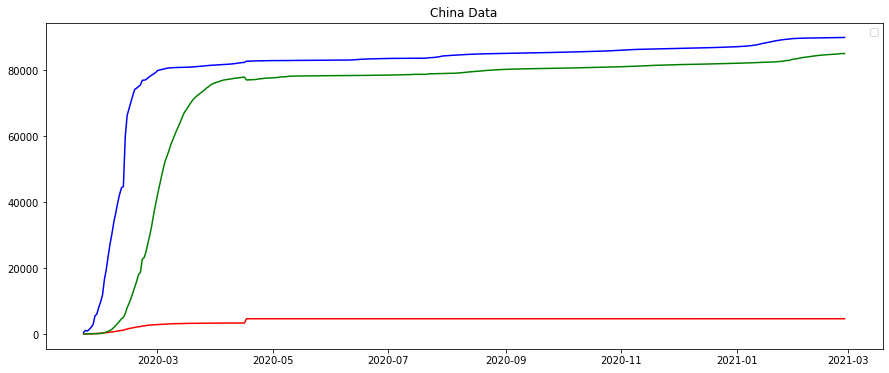

In [107]:
cud = cd.groupby('ObservationDate')
sum_ch = cud.sum('Deaths')
sum_ch = sum_ch.reset_index(drop=False)

x = sum_ch['ObservationDate']
y1 = sum_ch['Deaths']
y2 = sum_ch['Confirmed']
y3 = sum_ch['Recovered']

fig,ax = plt.subplots(figsize=(15, 6))
plt.title("China Data")
plt.legend()
plt.plot(x, y1, label="Deaths", color="red")
plt.plot(x, y2, label="Confirmed", color="blue")
plt.plot(x, y3, label="Recovered", color="green")
plt.show()

### By looking at the graphs, we can see that US has shown surge in death cases while Iran has shown surge in most death cases

# Now, calculating the death rate

## For US

In [108]:
sum_deaths = gud['Deaths'].sum()
sum_confirmed = gud['Confirmed'].sum()

sum_deaths = sum_deaths[-1:]
sum_confirmed = sum_confirmed[-1:]
death_ratio = (sum_deaths / sum_confirmed) * 100
death_ratio

ObservationDate
2021-02-27    1.793044
dtype: float64

## For Iran

In [109]:
sum_deaths = gird['Deaths'].sum()
sum_confirmed = gird['Confirmed'].sum()

sum_deaths = sum_deaths[-1:]
sum_confirmed = sum_confirmed[-1:]
death_ratio = (sum_deaths / sum_confirmed) * 100
death_ratio

ObservationDate
2021-02-27    3.695263
dtype: float64

## For China

In [110]:
sum_deaths = cud['Deaths'].sum()
sum_confirmed = cud['Confirmed'].sum()

sum_deaths = sum_deaths[-1:]
sum_confirmed = sum_confirmed[-1:]
death_ratio = (sum_deaths / sum_confirmed) * 100
death_ratio

ObservationDate
2021-02-27    5.157242
dtype: float64

# Now, calculating recovery rate

## For US

In [111]:
sum_recovered = gud['Recovered'].sum()
sum_confirmed = gud['Confirmed'].sum()

sum_recovered = sum_deaths[-1:]
sum_confirmed = sum_confirmed[-1:]
recovery_ratio = (sum_recovered / sum_confirmed) * 100
recovery_ratio

ObservationDate
2021-02-27    0.016236
dtype: float64

In [112]:
sum_recovered = gird['Recovered'].sum()
sum_confirmed = gird['Confirmed'].sum()

sum_recovered = sum_recovered[-1:]
sum_confirmed = sum_confirmed[-1:]
recovery_ratio = (sum_recovered / sum_confirmed) * 100
recovery_ratio

ObservationDate
2021-02-27    85.421946
dtype: float64

In [113]:
sum_recovered = cud['Recovered'].sum()
sum_confirmed = cud['Confirmed'].sum()

sum_recovered = sum_recovered[-1:]
sum_confirmed = sum_confirmed[-1:]
recovery_ratio = (sum_recovered / sum_confirmed) * 100
recovery_ratio

ObservationDate
2021-02-27    94.600247
dtype: float64

### By looking at the values, we can observe that China has the most efficient recovery ratio. 

#### Question # 04

In this question, we will look at another data file namely `time_series_covid_19_deaths.csv`.
In this file, time series data of death occurred due to COVID-19 in countries/states/provinces is given.

1. Read the file and examine the features.
2. Clean the dataset by dropping missing rows with data points.
3. Since you already have information for States/Provinces in US, and China with most deaths, you can use those States/Provinces and plot the number of deaths against each of the top 5 states in both China and US.

In [114]:
df1 = pd.read_csv('time_series_covid_19_deaths.csv')


#Cleaning the data
df1 = df1.dropna()
df1 = df1.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars = df1.columns[4:],var_name='Date', value_name='Deaths')
df1.head(10)

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0
1,New South Wales,Australia,-33.8688,151.2093,1/22/20,0
2,Northern Territory,Australia,-12.4634,130.8456,1/22/20,0
3,Queensland,Australia,-27.4698,153.0251,1/22/20,0
4,South Australia,Australia,-34.9285,138.6007,1/22/20,0
5,Tasmania,Australia,-42.8821,147.3272,1/22/20,0
6,Victoria,Australia,-37.8136,144.9631,1/22/20,0
7,Western Australia,Australia,-31.9505,115.8605,1/22/20,0
8,Alberta,Canada,53.9333,-116.5765,1/22/20,0
9,British Columbia,Canada,53.7267,-127.6476,1/22/20,0


## For China

In [115]:
cmd = df1[df1["Country/Region"] == "China"]
gcd = cmd.groupby('Province/State')
deaths_ch = gcd.sum('Deaths')

#Sorting in decending order
sort_ch = deaths_ch.sort_values(by=['Deaths'], ascending= False)
#Seleceting top 5 states
top_ch = sort_ch[0:5]
top_ch.head(5)

,Lat,Long,Deaths
Province/State,,,
Hubei,12483.1668,45245.0921,1622012
Hong Kong,8986.9000,46022.6000,26527
Henan,15271.9671,46306.3926,8358
Heilongjiang,19288.3860,51487.8845,4991
Beijing,16193.5072,46914.9226,3318


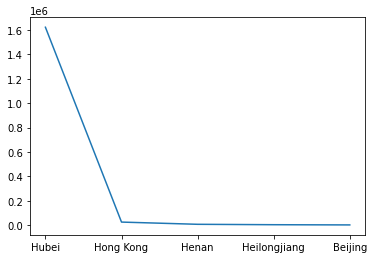

In [116]:
data = top_ch.reset_index(drop=False)

States = data['Province/State']
Deaths = data['Deaths']

plt.plot(States, Deaths)
plt.show()

## For US

In [117]:
umd = df[df["Country/Region"] == "US"]
gud = umd.groupby('Province/State')
deaths_us = gud.sum('Deaths')

#Sorting in decending order
sort_us = deaths_us.sort_values(by=['Deaths'], ascending= False)
#Seleceting top 5 states
top_us = sort_us[0:5]
top_us.head(5)

,SNo,Confirmed,Deaths,Recovered
Province/State,,,,
New York,37724933,204886336.0,10888511.0,0.0
California,37648885,360363199.0,5358608.0,40.0
Texas,37769945,294436008.0,5072817.0,0.0
New Jersey,37724344,98775452.0,5054435.0,2.0
Florida,37665975,235208135.0,4153905.0,0.0


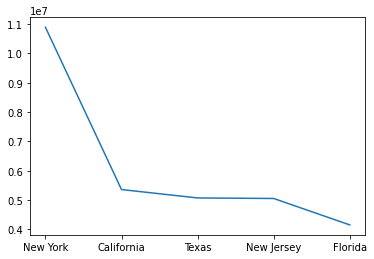

In [118]:
data = top_us.reset_index(drop=False)

States = data['Province/State']
Deaths = data['Deaths']

plt.plot(States, Deaths)
plt.show()

#### Question # 05

This aspect is interesting since we would get to work with Geographical Plots. You have the latitude and longitude data from the `time_series_covid_19_deaths.csv` data file. You will use that for this question.

We will use BaseMap library to plot the latitude and longitude points on the world map.
You can download BaseMap by running the following command in your terminal/command line prompt: 
```
pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
```

1. Once you have it installed, load up a basic world map and plot the values.
2. By visually examining, answer in which countries, the points scatter the most?

For reference and working directions with Basemap, you may take help from this video tutorial: <a href="https://www.youtube.com/watch?time_continue=114&v=XiZbrii49pI&feature=emb_title" BASEMAP >BASEMAP TUTORIAL</a>

In [119]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759571 sha256=e34f1086fe5326aea823b6b55b1b3fd0d591a3804a0a415ffbbd2828cf355dca
  Stored in directory: /tmp/pip-ephem-wheel-cache-x4_vajsz/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


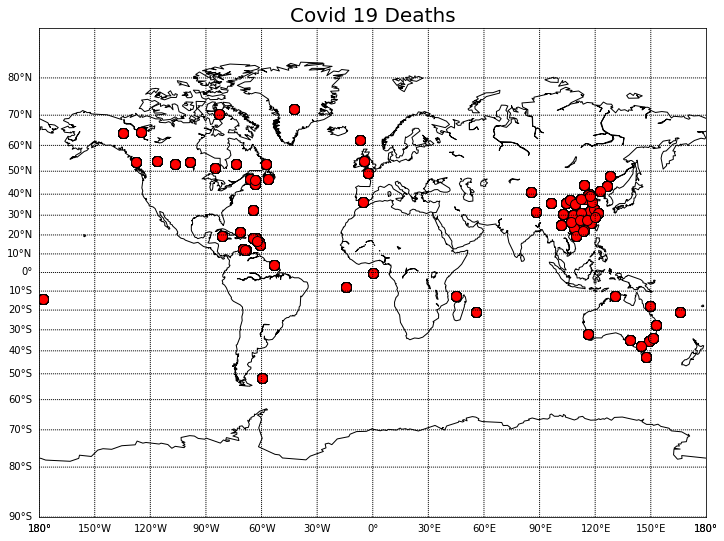

In [120]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12,9))
m = Basemap(projection="mill",
            llcrnrlat =-90,
            urcrnrlat = 90,
            llcrnrlon=-180,
            urcrnrlon=180,
            resolution='c')

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=([0,0,0,1]))

x = df1['Long'].tolist()
y = df1['Lat'].tolist()

m.scatter(x, y, latlon=True, c="red", s=100, marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

plt.title('Covid 19 Deaths', fontsize=20)

plt.show()

#### Question # 06

For this question, we will use the `COVID19_open_line_list.csv` file. 

1. Read the data file and examine the features
2. We will be working with these feature columns: `age, sex, symptoms, city, province, lives_in_Wuhan, and travel_history_location`.
3. Since these are textual values, you need to encode them to integers (maintain an encoding dictionary as well).
    * For example in `symptoms` column, you might assign fever -> 1, pneumonia -> 2, headache -> 3, etc.
    * There are several multiple symptoms as well for a single row, for those you can just sum the assigned integers. For example a row might list these symptons: fever, headache, since fever -> 1 and headache -> 3, you can replace fever, headache with 1+3 = 4 and so on. Start the integer encoding from 1 so that when summing the numbers, you donot get the same number back (e.g. 0+3 = 3).
    * You can do the same for other columns, just to avoid ambiguity, you can encode each column differently. 
    * For example, for the `symptoms` column, you starting assigning numbers from 1, let's say there were 4 symptoms, so the numbers would range from 1 - 4. For the next column, you can use numbers from 5 and so on. You are free to encode as you want. 
    * For ease, you can also use sklearn's LabelEncoder.
4. Once you have integer coded the entire dataset (7 columns), you can compute the correlation between city (let city column be `y` for this case) and every other column.
5. Pick the most 2 correlated fields (using the absolute value of correlations) and make `X`.
6. Use MinMaxScaler to scale X. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately.
7. Print the head (5 rows) and tail (5 rows) of this dataframe.